In [214]:
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C

In [215]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [277]:
np.random.seed(1899)
X = np.atleast_2d([1., 3., 7., 8., 9.]).T
kernel = .5 * RBF(1, (1e-2, 1e2))
X_ = np.linspace(0, 10, 100)
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.linspace(0, 10, 100)
# Observations
y = f(X).ravel()

In [217]:
def plot_gp(x, mean, std, y_lim, gp, samples=None):
    plt.plot(x, mean, 'b-', lw=3, zorder=9, label=u'Mean Prediction')
    plt.fill_between(x, mean - 1.9600*std, mean + 1.9600*std,
                     alpha=0.2, color='k', lw=2, label='95% confidence interval')
    if samples is not None:
        plt.plot(x, y_samples, lw=1.5)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(*y_lim)
    plt.legend(loc='upper left')
    return plt

# GP without observations RBF Kernel

/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:369: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


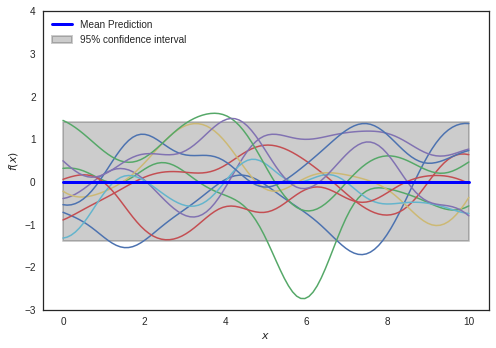

In [278]:
gp = GaussianProcessRegressor(kernel=kernel)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plot_gp(X_, y_mean, y_std, (-3, 4), gp, y_samples).show()

# GP without observations Matern Kernel

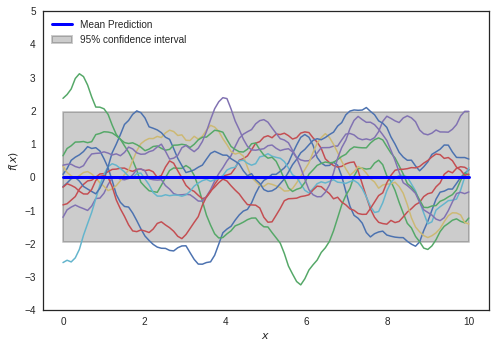

In [219]:
matern = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
gp = GaussianProcessRegressor(kernel=matern, n_restarts_optimizer=10)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plot_gp(X_, y_mean, y_std, (-4, 5), gp, y_samples).show()

# GP with observations without noise

/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:369: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


0.707**2 * RBF(length_scale=1)
-13.0029741088


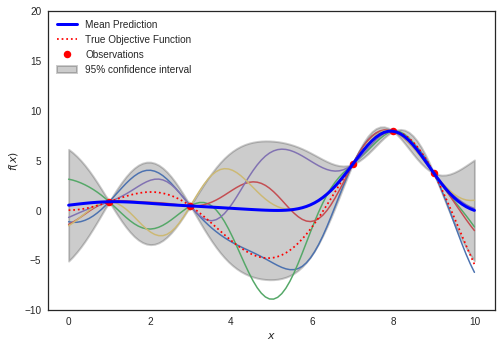

In [279]:
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

# sample
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
p = plot_gp(x, y_pred, sigma, (-10, 20), gp, y_samples)
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.plot(X, y, 'r.', markersize=15, label=u'Observations')
print(gp.kernel)
print(gp.log_marginal_likelihood_value_)
plt.legend(loc='upper left')
p.show()

0.707**2 * RBF(length_scale=3) + WhiteKernel(noise_level=0.1)
-75.1840583225


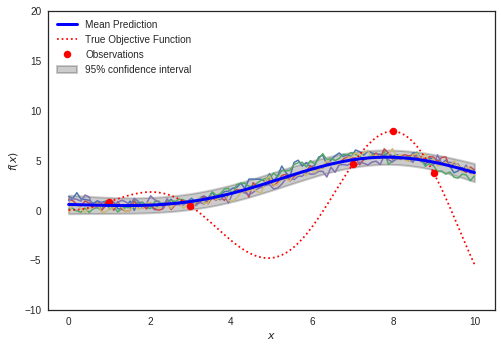

In [280]:
rbf_short_length = .5 * RBF(length_scale=3) + WhiteKernel(1e-1)
gp = GaussianProcessRegressor(kernel=rbf_short_length, optimizer=None)

gp.fit(X, y)

y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

y_samples = gp.sample_y(X_[:, np.newaxis], 5)

p = plot_gp(x, y_pred, sigma, (-10, 20), gp, y_samples)
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.plot(X, y, 'r.', markersize=15, label=u'Observations')
plt.legend(loc='upper left')
print(gp.kernel)
print(gp.log_marginal_likelihood_value_)
p.show()

# GP with observation with noise

In [222]:
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y_noise = y + noise

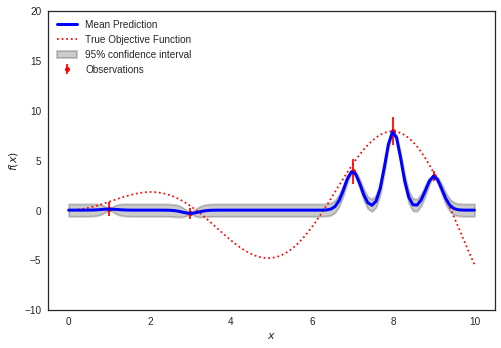

In [223]:
noise_kernel = 0.1 * RBF(length_scale=0.2) + WhiteKernel(0.00005)
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=noise_kernel, optimizer=None)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y_noise)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

#sample
#y_samples = gp.sample_y(X_[:, np.newaxis], 5)

#plot
p = plot_gp(x, y_pred, sigma, (-10, 20), gp)
p.errorbar(X.ravel(), y_noise, dy, fmt='r.', markersize=10, label=u'Observations')
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.legend(loc='upper left')
p.show()

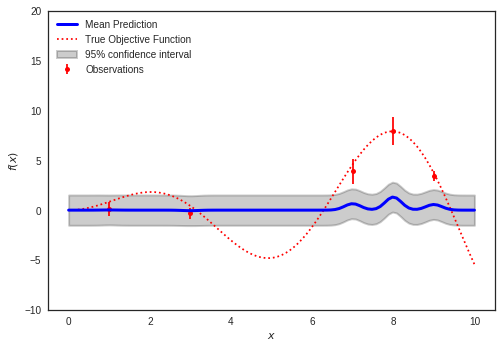

In [224]:
noise_kernel = 0.1 * RBF(length_scale=.2) + WhiteKernel(0.5)
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=noise_kernel, optimizer=None)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y_noise)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

#sample
#y_samples = gp.sample_y(X_[:, np.newaxis], 5)

#plot
p = plot_gp(x, y_pred, sigma, (-10, 20), gp)
p.errorbar(X.ravel(), y_noise, dy, fmt='r.', markersize=10, label=u'Observations')
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.legend(loc='upper left')
p.show()

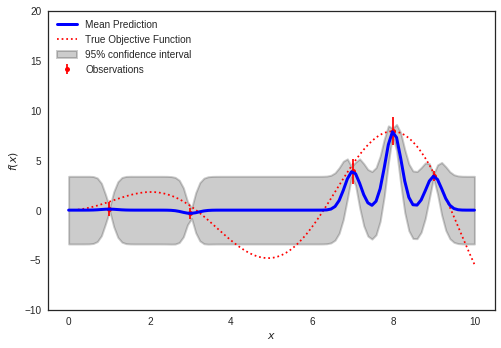

In [225]:
noise_kernel = 3 * RBF(length_scale=0.2) + WhiteKernel(0.00005)
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=noise_kernel, optimizer=None)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y_noise)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

#sample
#y_samples = gp.sample_y(X_[:, np.newaxis], 5)

#plot
p = plot_gp(x, y_pred, sigma, (-10, 20), gp)
p.errorbar(X.ravel(), y_noise, dy, fmt='r.', markersize=10, label=u'Observations')
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.legend(loc='upper left')
p.show()

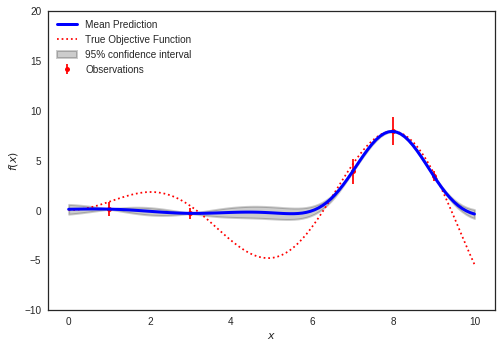

In [226]:
noise_kernel = 0.1 * RBF(length_scale=1) + WhiteKernel(0.00005)
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=noise_kernel, optimizer=None)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y_noise)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

#sample
#y_samples = gp.sample_y(X_[:, np.newaxis], 5)

#plot
p = plot_gp(x, y_pred, sigma, (-10, 20), gp)
p.errorbar(X.ravel(), y_noise, dy, fmt='r.', markersize=10, label=u'Observations')
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.legend(loc='upper left')
p.show()

# Acquisition functions

/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:369: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


0.707**2 * RBF(length_scale=1)
-13.0029741088


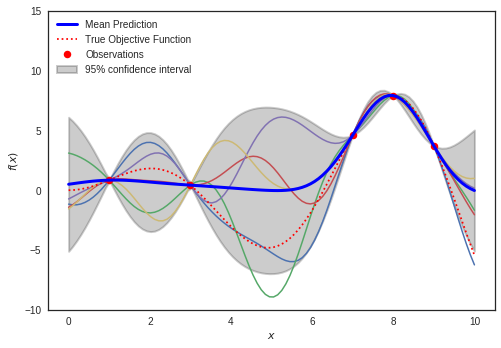

In [281]:
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)

# sample
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
p = plot_gp(x, y_pred, sigma, (-10, 15), gp, y_samples)
p.plot(x, f(x), 'r:', label=u'True Objective Function')
p.plot(X, y, 'r.', markersize=15, label=u'Observations')
print(gp.kernel)
print(gp.log_marginal_likelihood_value_)
p.legend(loc='upper left')
p.show()

## Expected Improvement

In [239]:
def calc_expected_improvement(observed_y, mu, sigma, xi=0.0):
    loss_optimum = np.min(observed_y)
    Z = (mu - loss_optimum - xi) / sigma
    return -1.0 * (mu - loss_optimum - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)

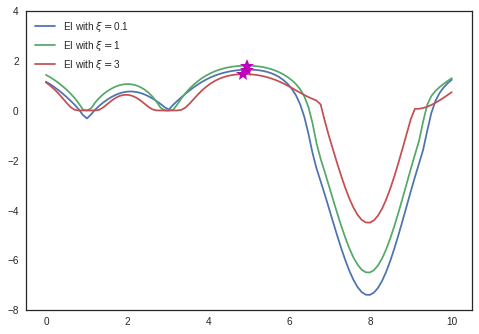

In [309]:
xis = [0.1, 1, 3]
for xi in xis:
    expected_improvement = calc_expected_improvement(y, y_pred, sigma, xi)
    optimum_idx = np.argmax(expected_improvement)
    next_x = x[optimum_idx]
    max_ei = expected_improvement[optimum_idx]
    plt.plot(x, expected_improvement, label=r'EI with $\xi=$'+str(xi))
    p.plot(next_x, max_ei, 'm*', markersize=15) # optimum marker
plt.legend(loc='upper left')
plt.ylim(-8.0, 4)
plt.show()

## Probability of Improvement

In [241]:
def calc_prob_improvement(observed_y, mu, sigma, xi=0.0):
    loss_optimum = np.min(observed_y)
    Z = (mu - loss_optimum - xi) / sigma
    return -1.0 * norm.cdf(Z)

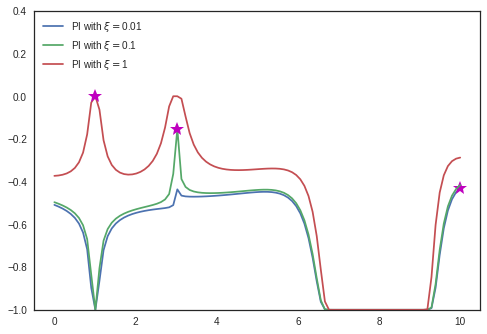

In [242]:
xis = [0.01, 0.1, 1]
for xi in xis:
    expected_improvement = calc_prob_improvement(y, y_pred, sigma, xi)
    optimum_idx = np.argmax(expected_improvement)
    next_x = x[optimum_idx]
    max_ei = expected_improvement[optimum_idx]
    plt.plot(x, expected_improvement, label=r'PI with $\xi=$'+str(xi))
    plt.plot(next_x, max_ei, 'm*', markersize=15) # optimum marker
plt.ylim(-1.0, 0.4)
plt.legend(loc='upper left')
plt.show()

## GP-UCB

In [243]:
def calc_gp_ucb(mu, sigma, nu, t, dims):
    delta = .1
    tau = (2* np.log( (t**(dims/2. + 2)) * (np.pi**2)/(3. * delta) ))
    kappa = np.sqrt(nu * tau)
    return - mu + kappa * sigma

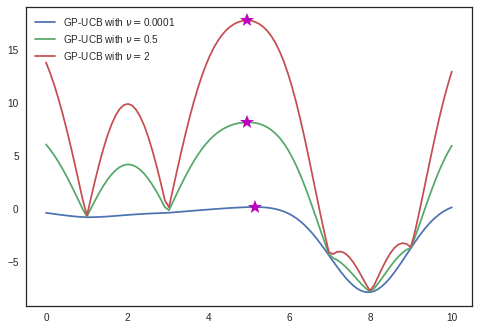

In [308]:
nus = [0.0001, 0.5, 2]
for i, nu in enumerate(nus):
    expected_improvement = calc_gp_ucb(y_pred, sigma, nu, i+1, 1)
    optimum_idx = np.argmax(expected_improvement)
    next_x = x[optimum_idx]
    max_ei = expected_improvement[optimum_idx]
    plt.plot(x, expected_improvement, label=r'GP-UCB with $\nu=$'+str(nu))
    p.plot(next_x, max_ei, 'm*', markersize=15) # optimum marker
plt.legend(loc='upper left')
plt.show()

# Sequential Bayesian Optimization

In [274]:
def plot_optim_row(ax, row_idx, x, mean, std, observed_x, observed_y):
    # prior
    ax[row_idx, 0].plot(x, mean, 'b-', lw=2, label=u'Mean Prediction')
    ax[row_idx, 0].fill_between(x, mean - 1.9600*std, mean + 1.9600*std,
                     alpha=0.2, color='k', lw=2, label='95% confidence interval')
    ax[row_idx, 0].plot(x, f(x), 'r:', label=u'True Objective Function')
    ax[row_idx, 0].plot(observed_x, observed_y, 'r.', markersize=10, label=u'Observations')
    # acquisition
    optimum_idx = np.argmax(expected_improvement)
    next_x = x[optimum_idx]
    max_ei = expected_improvement[optimum_idx]
    ax[row_idx, 1].plot(x, expected_improvement, 'g-')
    ax[row_idx, 1].plot(next_x, max_ei, 'm*', markersize=15) # optimum marker
    return next_x

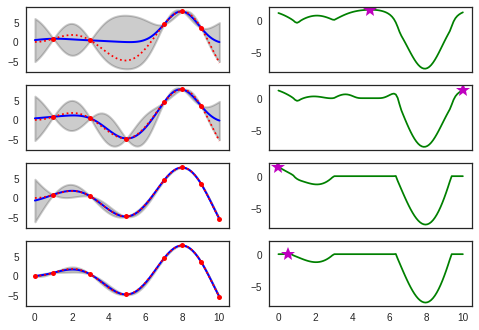

In [276]:
# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
xi = 0.01
observed_x = X
observed_y = y
iterations = 4
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(observed_x, observed_y)
fig, axes = plt.subplots(iterations, 2, sharex=True, sharey='col')
for i in range(iterations):
    y_pred, sigma = gp.predict(x[:, np.newaxis], return_std=True)
    expected_improvement = calc_expected_improvement(y, y_pred, sigma, xi)
    next_x = plot_optim_row(axes, i, x, y_pred, sigma, observed_x, observed_y)
    observed_x = np.vstack((observed_x, np.atleast_2d([next_x])))
    observed_y= f(observed_x).ravel()
    gp.fit(observed_x, observed_y)
plt.show()

# Hyperparameter optimization

In [380]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss, make_scorer
from skopt import BayesSearchCV
from scipy.stats import expon, randint

In [320]:
random_state = 1899
scoring = 'neg_log_loss'
iris = datasets.load_iris()
X, y = iris.data, iris.target

param_space = {'kernel': ['rbf'], 
               'gamma': [1e-4, 1e-3],
               'C': [1, 10, 100, 1000]}

## Grid Search

In [334]:
grid_search = GridSearchCV(svm.SVC(probability=True, random_state=random_state),param_grid=param_space, 
                           cv=5, scoring=scoring)

grid_search.fit(X, y)
grid_search.best_score_

-0.10120585028837195

## Randomized Search

In [402]:
random_space = {'C': list(np.linspace(1e-4, 1e-3,100)), 'gamma': list(np.linspace(1,1000,100)),
  'kernel': ['rbf']}

random_search = RandomizedSearchCV(svm.SVC(probability=True, random_state=random_state), 
                                   cv=5, n_iter=50, scoring=scoring, 
                                   param_distributions=random_space)
random_search.fit(X, y)
random_search.best_score_

-1.09861228866811

## Bayesian Optimization

In [369]:
bayes_space = {'kernel': ['rbf'], 
               'gamma': (1e-4, 1e-3, 'log-uniform'),
               'C': (1, 1000, 'log-uniform')}
bayes_search = BayesSearchCV(svm.SVC(probability=True, random_state=random_state), 
                             cv=5, scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True), 
                             search_spaces=param_space, n_iter=50)
bayes_search.fit(X, y)

/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:384: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1899, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_iter=50, n_jobs=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False,
       scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
       search_spaces={'gamma': [0.0001, 0.001], 'kernel': ['rbf'], 'C': [1, 10, 100, 1000]},
       verbose=0)

In [384]:
bayes_search.best_score_

-0.099658666497031048

In [389]:
def get_iter_score(mean_scores):
    best_score = 0
    iter_score = []
    for i, score in enumerate(mean_scores):
        best_score = min(best_score, score)
        iter_score.append(best_score)
    return iter_score

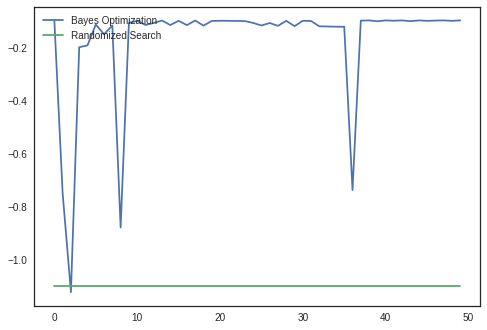

In [395]:
mean_score = bayes_search.cv_results_['mean_test_score']

plt.plot(range(len(iter_score)), bayes_search.cv_results_['mean_test_score'], label=u'Bayes Optimization')
plt.plot(range(len(iter_score)), random_search.cv_results_['mean_test_score'], label=u'Randomized Search')
plt.legend(loc='upper left')
plt.show()

In [403]:
random_search.cv_results_
#list(np.linspace(1,1000,100))

/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/flo/opt/anaconda3/envs/py3analytics/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

{'mean_fit_time': array([ 0.0046876 ,  0.00416145,  0.00402403,  0.00469179,  0.00469298,
         0.00394258,  0.00416713,  0.00425515,  0.00386815,  0.00403433,
         0.0038568 ,  0.00382447,  0.00446281,  0.0039484 ,  0.00378656,
         0.00479732,  0.00427504,  0.00470505,  0.00403223,  0.0040792 ,
         0.0038301 ,  0.00413456,  0.00470195,  0.00429835,  0.00404458,
         0.00376277,  0.00416846,  0.00448761,  0.00390077,  0.00412841,
         0.00450006,  0.0037889 ,  0.00373192,  0.0039619 ,  0.00387278,
         0.00420265,  0.00386629,  0.00411515,  0.0039959 ,  0.00380898,
         0.00445967,  0.00416884,  0.00416493,  0.00384941,  0.00381742,
         0.00387783,  0.00404491,  0.00425858,  0.00425282,  0.00389833]),
 'mean_score_time': array([ 0.0011241 ,  0.00076556,  0.00069389,  0.00091248,  0.00089097,
         0.00074024,  0.00072236,  0.00070381,  0.00067573,  0.00078244,
         0.00072908,  0.00067821,  0.00072412,  0.00070467,  0.00070562,
         0.00